# <center> Trabalho de Aprendizado de Máquina 1 </center>

O seguinte trabalho tem por intenção comparar cinco algoritmos de classificação de dados para analisar e predizer se, dada uma cidade do Brasil, ela é capital ou não do país.

O grupo é formado pelos integrantes:

- Rafael de Camillo Masson, RA: 790774
- Igor Kenji Kawai Ueno, RA: 790769
- Pedro Henrique Casarotto, RA: 790935

Para o trabalho, utilizou-se o dataset <strong> Brazilian Cities </strong>, disponível no seguinte link: https://www.kaggle.com/datasets/crisparada/brazilian-cities

# Instanciação das bibliotecas e dos dados

In [ ]:
# Criar as pastas Datasets/Brazilian_Cities com os arquivos cvs
# para não precisar dar upload quando for rodar o notebook
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('drive/MyDrive/Datasets/Brazilian_Cities/BRAZIL_CITIES.csv', sep=';')
# data = pd.read_csv('BRAZIL_CITIES.csv', sep=';')          # caso o arquivo seja colocado diretamente no ambiente virtual do Colab
data

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,...,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
0,Abadia De Goiás,GO,0,6876.0,6876.0,0.0,2137.0,1546.0,591.0,5300.0,...,NaN,NaN,NaN,2158.0,1246.0,0.0,NaN,NaN,NaN,1.0
1,Abadia Dos Dourados,MG,0,6704.0,6704.0,0.0,2328.0,1481.0,847.0,4154.0,...,NaN,NaN,NaN,2227.0,1142.0,0.0,NaN,NaN,NaN,1.0
2,Abadiânia,GO,0,15757.0,15609.0,148.0,4655.0,3233.0,1422.0,10656.0,...,1.0,33724584.0,67091904.0,2838.0,1426.0,0.0,NaN,NaN,NaN,3.0
3,Abaeté,MG,0,22690.0,22690.0,0.0,7694.0,6667.0,1027.0,18464.0,...,2.0,44974716.0,371922572.0,6928.0,2953.0,0.0,NaN,NaN,NaN,4.0
4,Abaetetuba,PA,0,141100.0,141040.0,60.0,31061.0,19057.0,12004.0,82956.0,...,4.0,76181384.0,800078483.0,5277.0,25661.0,0.0,NaN,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5568,Xique-Xique,BA,0,45536.0,45536.0,0.0,11637.0,8461.0,3176.0,32497.0,...,3.0,51944373.0,276223306.0,2125.0,5064.0,0.0,NaN,NaN,NaN,2.0
5569,Zabelê,PB,0,2075.0,2075.0,0.0,673.0,489.0,184.0,1469.0,...,NaN,NaN,NaN,87.0,162.0,0.0,NaN,NaN,NaN,NaN
5570,Zacarias,SP,0,2335.0,2335.0,0.0,799.0,638.0,161.0,1836.0,...,NaN,NaN,NaN,901.0,346.0,0.0,NaN,NaN,NaN,1.0
5571,Zé Doca,MA,0,50173.0,50152.0,21.0,11886.0,7611.0,4275.0,30803.0,...,3.0,34835818.0,531526331.0,1725.0,11087.0,0.0,NaN,NaN,NaN,1.0


O dataframe consiste em um conjunto de dados sobre as cidades do Brasil, incluindo a população, quantidade de empresas, área, população rual e urbana, IDH, PIB, e até mesmo o número de carros e motocicletas registrada na cidade. A maioria dos dados foram obtidos do censo do IBGE realizado em 2010.

O objetivo desse trabalho, como já foi dito, é aplicar diversos algoritmos de classificação a fim de se classificar se uma cidade é capital ou não do Brasil.

In [ ]:
data.CAPITAL.value_counts()

0    5546
1      27
Name: CAPITAL, dtype: int64

# Pré-processamento de dados

## Tratamento de dados faltantes

A primeira coisa a ser feita é tratar os dados faltantes do dataset.


### Colunas com excesso de valores faltantes

A primeira etapa a realizar é a retirada das colunas referentes a quantidade de Walmart, Uber, McDonald's, hotéis e quartos em hotéis das cidades, já que elas estão praticamente vazias e desatualizadas.

Além disso, nota-se que as colunas relacionadas a turismo e a agências bancárias têm pouco mais da metade de seus valores faltando. Então pode-se considerar suas retiradas também.

Por fim, ainda que haja uma quantidade considerável de dados sobre despesas municipais, comparado-a com as demais colunas, é visível que há muito menos valores a serem utilizados, por isso, pode-se considerar sua retirada.

As demais colunas têm um porcentagem baixa de valores faltantes, então pode-se considerar alguma estratégia pra contornar esses tipos de valores.

In [ ]:
na_values = pd.DataFrame(data={'NA_VALUES':data.isna().sum().sort_values(ascending=False)})
na_values['NA_VALUES_PERCENTAGE'] = data.isna().mean().round(4).mul(100).sort_values(ascending=False)
print(na_values.to_markdown())

|                        |   NA_VALUES |   NA_VALUES_PERCENTAGE |
|:-----------------------|------------:|-----------------------:|
| WAL-MART               |        5471 |                  98.17 |
| UBER                   |        5448 |                  97.76 |
| MAC                    |        5407 |                  97.02 |
| HOTELS                 |        4686 |                  84.08 |
| BEDS                   |        4686 |                  84.08 |
| REGIAO_TUR             |        2288 |                  41.06 |
| CATEGORIA_TUR          |        2288 |                  41.06 |
| Pu_Bank                |        2231 |                  40.03 |
| Pu_Assets              |        2231 |                  40.03 |
| Pr_Assets              |        2231 |                  40.03 |
| Pr_Bank                |        2231 |                  40.03 |
| Pu_Agencies            |        2231 |                  40.03 |
| Pr_Agencies            |        2231 |                  40.03 |
| MUN_EXPE

In [ ]:
for row in na_values.index:
  if na_values['NA_VALUES_PERCENTAGE'][row] > 20:
    data = data.drop(columns=row)

### Colunas com poucos valores faltantes

Para este caso, optou-se por substituir os valores faltantes da tabela com o valor da moda respectivo da coluna. A moda foi escolhida a fim de que o valor dos outliers não influenciassem a análise.

In [ ]:
data = data.fillna(data.mode().iloc[0])

## Tirando dados irrelevantes

Outra coisa também que foi levada em consideração foi a relevância das colunas para classificação das capitais. Desse modo, algumas colunas foram tiradas do dataset, como as colunas de latitude, longitude, altura, número de moradores de acordo com os anos vivendo na cidade,  número de telefones fixos, e posição no ranking de HDH e da população pelo PIB (para não haver colunas duplicadas).

In [ ]:
data = data.drop(['LAT', 'LONG', 'ALT', 'IBGE_1', 'IBGE_1-4', 'IBGE_5-9', 'IBGE_10-14', 'IBGE_15-59', 'IBGE_60+', 'IDHM Ranking 2010', 'FIXED_PHONES', 'POP_GDP'], axis=1)

Assim sendo, o pré-processameno dos dados foi realizado e é possível iniciar a fase de Análise Exploratória.

In [ ]:
data.head()

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,...,COMP_P,COMP_Q,COMP_R,COMP_S,COMP_T,COMP_U,Cars,Motorcycles,Wheeled_tractor,POST_OFFICES
0,Abadia De Goiás,GO,0,6876.0,6876.0,0.0,2137.0,1546.0,591.0,5300.0,...,6.0,6.0,1.0,5.0,0.0,0.0,2158.0,1246.0,0.0,1.0
1,Abadia Dos Dourados,MG,0,6704.0,6704.0,0.0,2328.0,1481.0,847.0,4154.0,...,9.0,14.0,6.0,19.0,0.0,0.0,2227.0,1142.0,0.0,1.0
2,Abadiânia,GO,0,15757.0,15609.0,148.0,4655.0,3233.0,1422.0,10656.0,...,11.0,5.0,1.0,8.0,0.0,0.0,2838.0,1426.0,0.0,3.0
3,Abaeté,MG,0,22690.0,22690.0,0.0,7694.0,6667.0,1027.0,18464.0,...,15.0,19.0,9.0,27.0,0.0,0.0,6928.0,2953.0,0.0,4.0
4,Abaetetuba,PA,0,141100.0,141040.0,60.0,31061.0,19057.0,12004.0,82956.0,...,155.0,33.0,15.0,56.0,0.0,0.0,5277.0,25661.0,0.0,2.0


# Análise exploratória de dados

Esta seção consiste em fazer a análise do dataframe a fim de que se possa entender um pouco mais dos dados.

Primeiro, vamos ver qual é a quantidade de capitais presentes no dataset

In [ ]:
count_non_copitas = data[data['CAPITAL'] == 0].shape[0]
count_capitals = data[data['CAPITAL'] == 1].shape[0]
count_capitals_percentage = round(count_capitals / (count_capitals + count_non_copitas), 4)
print(f'Apenas {count_capitals_percentage}% das cidades são capitais.')
print(f'Isto é, {count_capitals} dentre as {count_capitals + count_non_copitas} cidades.')

Apenas 0.0048% das cidades são capitais.
Isto é, 27 dentre as 5573 cidades.


In [ ]:
print(f'No dataset original, há um total de {na_values["NA_VALUES"].sum()} valores faltantes.')

No dataset original, há um total de 45670 valores faltantes.


Não há cidades de estados diferentes com o mesmo nome.

In [ ]:
print(data[data[['CITY', 'STATE']].duplicated()].to_markdown())

| CITY   | STATE   | CAPITAL   | IBGE_RES_POP   | IBGE_RES_POP_BRAS   | IBGE_RES_POP_ESTR   | IBGE_DU   | IBGE_DU_URBAN   | IBGE_DU_RURAL   | IBGE_POP   | IBGE_PLANTED_AREA   | IBGE_CROP_PRODUCTION_$   | IDHM   | IDHM_Renda   | IDHM_Longevidade   | IDHM_Educacao   | PAY_TV   | AREA   | ESTIMATED_POP   | RURAL_URBAN   | GVA_AGROPEC   | GVA_INDUSTRY   | GVA_SERVICES   | GVA_PUBLIC   |  GVA_TOTAL    | TAXES   | GDP   | GDP_CAPITA   | GVA_MAIN   | COMP_TOT   | COMP_A   | COMP_B   | COMP_C   | COMP_D   | COMP_E   | COMP_F   | COMP_G   | COMP_H   | COMP_I   | COMP_J   | COMP_K   | COMP_L   | COMP_M   | COMP_N   | COMP_O   | COMP_P   | COMP_Q   | COMP_R   | COMP_S   | COMP_T   | COMP_U   | Cars   | Motorcycles   | Wheeled_tractor   | POST_OFFICES   |
|--------|---------|-----------|----------------|---------------------|---------------------|-----------|-----------------|-----------------|------------|---------------------|--------------------------|--------|--------------|-------------------

Uma matriz de correlação foi gerada a fim de se analisar se os dados apresentavam alta ou baixa correlação entre si.

<ipython-input-1152-76913f52a6cc>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



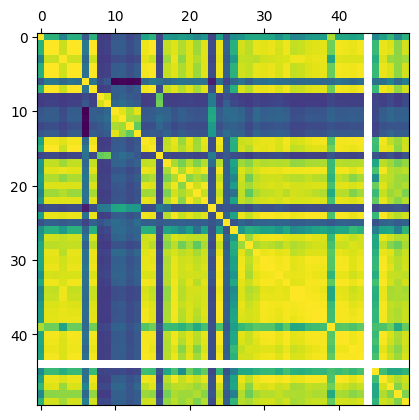

In [ ]:
import matplotlib.pyplot as plt

plt.matshow(data.corr())
plt.show()

Pode-se ver a matriz expandida

<ipython-input-1153-94341d4cbf0c>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



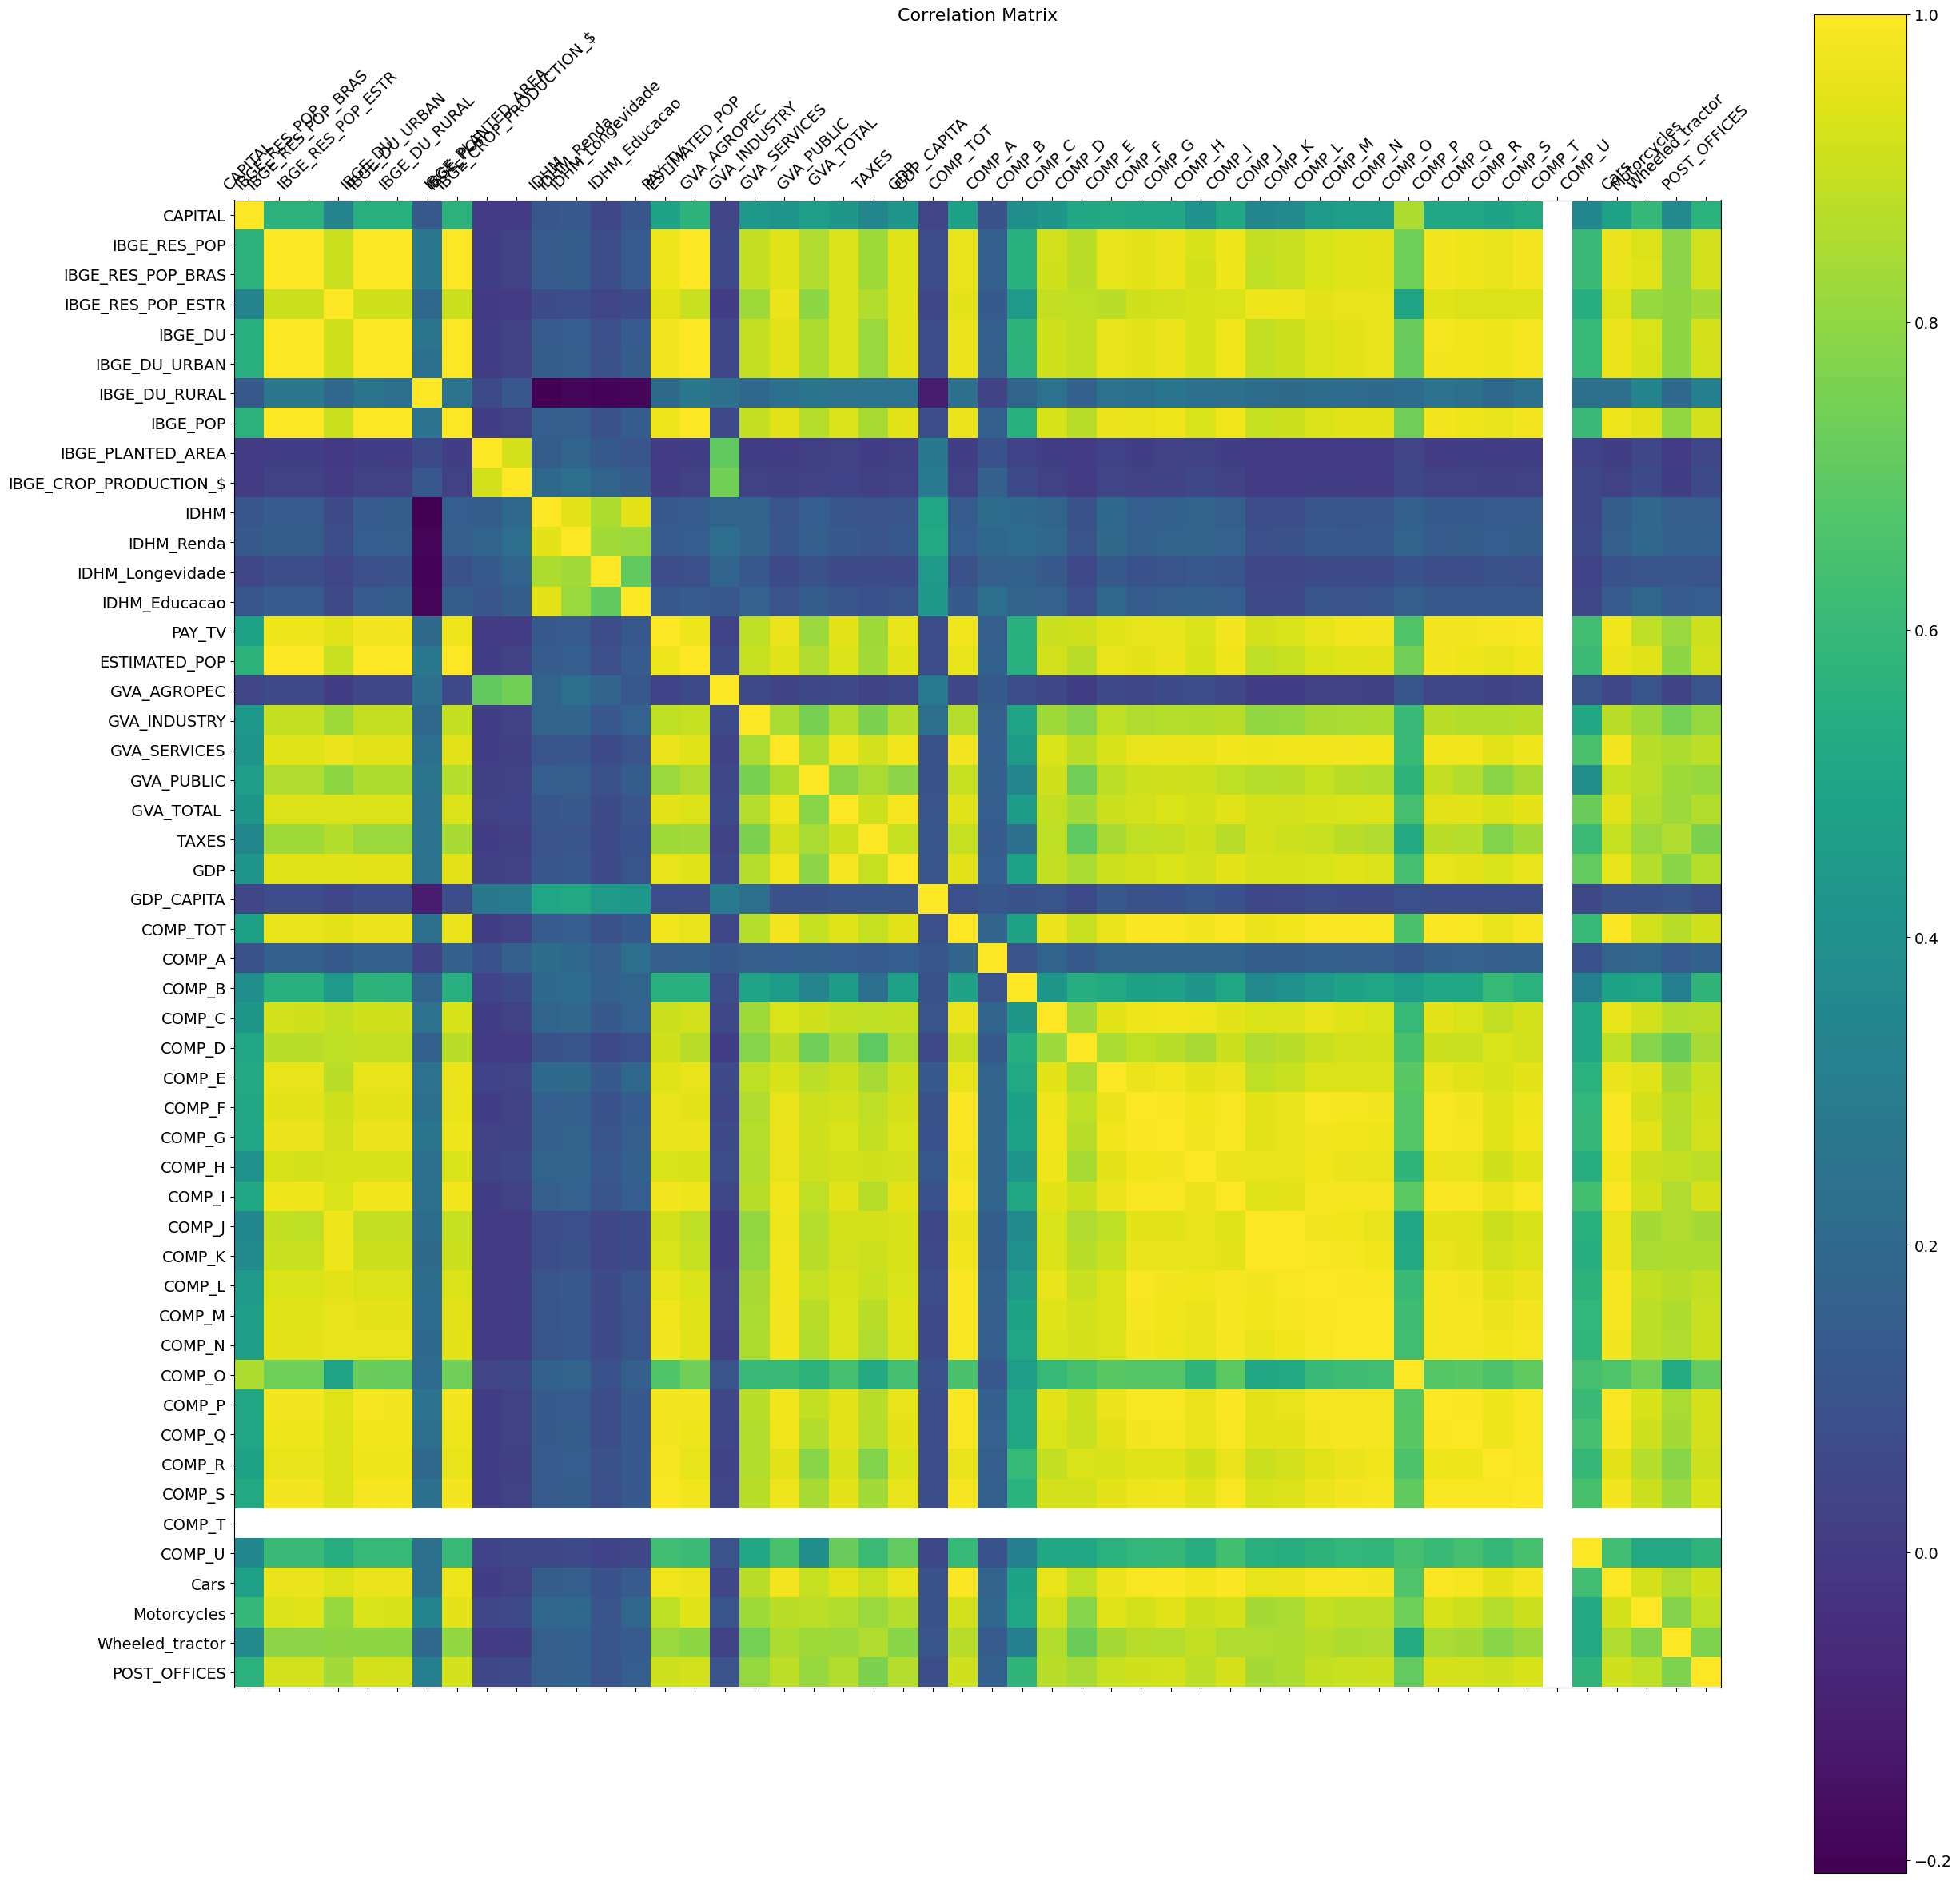

In [ ]:
f = plt.figure(figsize=(30, 30))
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

#### Gráficos

<Axes: ylabel='CITY'>

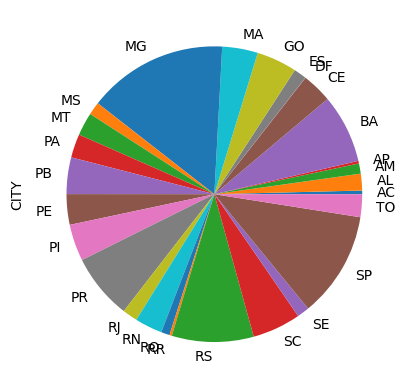

In [ ]:
data.groupby(['STATE'])['CITY'].count().plot(kind = 'pie')

<Axes: ylabel='CITY'>

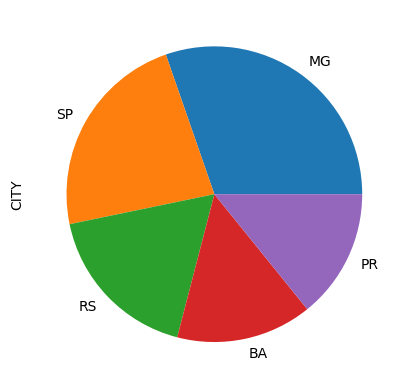

In [ ]:
data.groupby(['STATE'])['CITY'].count().sort_values(ascending=False).head(5).plot(kind = 'pie')

Obtendo o índice médio de IDH por estado.

<Axes: xlabel='STATE'>

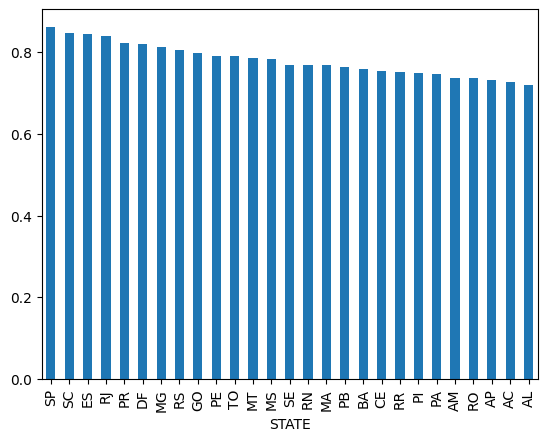

In [ ]:
data.groupby(['STATE'])['IDHM'].mean().sort_values(ascending=False).plot.bar()

<Axes: xlabel='STATE'>

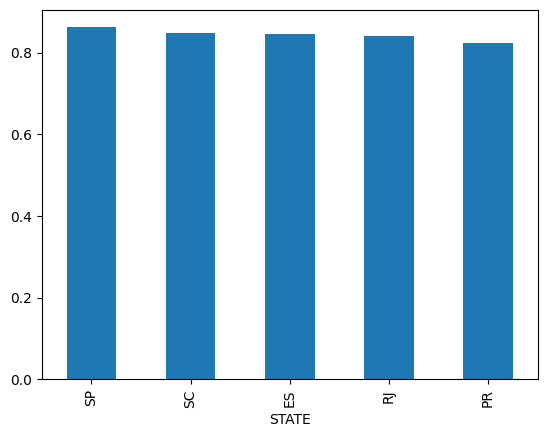

In [ ]:
data.groupby(['STATE'])['IDHM'].mean().sort_values(ascending=False).head(5).plot.bar()

Obtendo a quantidade de carros totais por estado. É possível observar que esse não é um fator importante para a decisão da capital, visto que o gráfico apresenta um fator muito heretogêneo por estado.

<Axes: xlabel='STATE'>

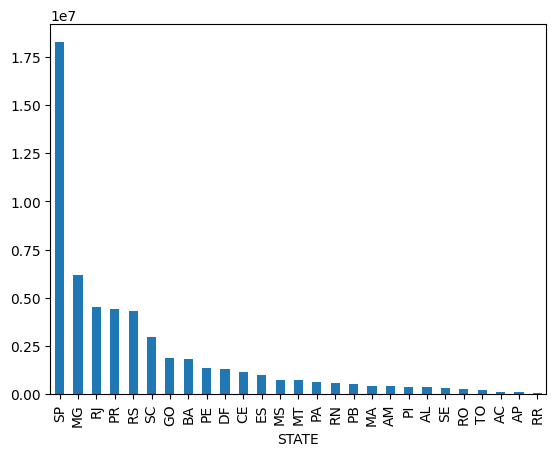

In [ ]:
data.groupby(['STATE'])['Cars'].sum().sort_values(ascending=False).plot.bar()

<Axes: xlabel='STATE'>

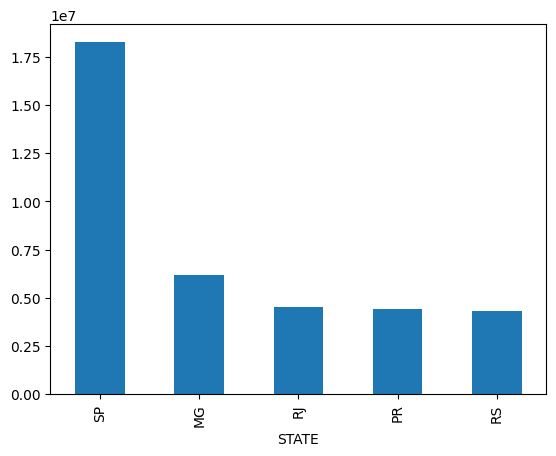

In [ ]:
data.groupby(['STATE'])['Cars'].sum().sort_values(ascending=False).head(5).plot.bar()

# Implementação de algoritmos de classificação

Nessa etapa, foi-se realizado a classificação dos algoritmos. A divisão se consistiu em cinco algoritmos:

- 1) Algoritmo de Naive Bayes: supõe que os atributos são independentes entre si, calculando a probabilidade de cada atributo ocorrer para cada classe alvo durante o treinamento. Foi escolhida a sua distribuição gaussiana devido ao dataset ser formado por valores contínuos.

- 2) Árvore de Decisão: cria vários critérios para decidir em qual caso a label vai ser definida como capital e em qual não vai. utilizou-se a medida de Gini para a análise, devido ao grande número de atributos do dataset.

- 3) Perceptron: sua escolha é positiva por ser ideal para gerar labels binárias. Além disso, os atributos utilizados são todos numéricos, o que torna esse algoritmo uma boa escolha.

- 4) SVM (Support Vector Manchine): busca uma linha de separação entre duas classes distintas por meio da análise dos dois pontos (um de cada classe) mais próximos um do outro.

- 5) k-Nearest Neighbors (k-NN):  modelo simples baseado em similaridade, dado um conjunto de exemplos rotulados (pares entrada e saída), uma nova entrada é comparada com os pares presentes no modelo e uma saída é produzida baseando-se naqueles mais próximos desta entrada.

Para prosseguir a análise, vamos fazer a normalização dos dados.

In [ ]:
# colocando a coluna de previsão como última do dataset
labels = data.pop('CAPITAL')
data.insert(len(data.columns), 'CAPITAL', labels)

# Excluindo valores que não são numéricos
data_predicao = data.select_dtypes(exclude='object')

# Fazendo a normalização/parametrização dos dados
min_max_scaler = preprocessing.MinMaxScaler()
data_escalada = min_max_scaler.fit_transform(data_predicao.values)
data_predicao = pd.DataFrame(data_escalada, columns=data_predicao.columns)

A seguir, está a implementação feita para cada um e os resultados obtidos a partir de tal análise.

## Algoritmo 1: Naive Bayes com distribuição Gaussiana

In [ ]:
# Importa o método de Naïve Bayes com distribuição Gaussiana do Sklearn
from sklearn.naive_bayes import GaussianNB

# Divizão dos dados em teino e teste
X_train, X_test, y_train, y_test = train_test_split(data_predicao.iloc[:, :-1], data_predicao.iloc[:, -1:], test_size=0.30)

# Criação de uma instância de classe
GNB = GaussianNB()
GNB = GNB.fit(X_train, y_train)

# Classe predita
y_predito = GNB.predict(X_test)



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
print('Análise de desempenho do algoritmo:')

print(f'Acurácia: {round(metrics.accuracy_score(y_test, y_predito)*100, 2)}%')
print(f'Precisão: {round(metrics.precision_score(y_test, y_predito)*100, 2)}%')
print(f'Recall: {round(metrics.recall_score(y_test, y_predito)*100, 2)}%')
print(f'F1-Score: {round(metrics.f1_score(y_test, y_predito)*100, 2)}%')

Análise de desempenho do algoritmo:
Acurácia: 98.09%
Precisão: 25.58%
Recall: 100.0%
F1-Score: 40.74%


Segundo o algoritmo, as capitais dos paises são:

In [ ]:
X_test['CAPITAL'] = y_test
X_test['CAPITAL_PREDITA'] = y_predito

# X_test[X_test['CAPITAL'] == 1]
tabela_resultados = pd.merge(data[['CITY', 'STATE']], X_test, how='inner', left_index=True, right_index=True)

print(f'Número de cidades alocadas como capitais: {len(tabela_resultados[tabela_resultados.CAPITAL_PREDITA == 1])}\n')
tabela_resultados[tabela_resultados.CAPITAL_PREDITA == 1][['CITY', 'STATE']]

Número de cidades alocadas como capitais: 43



,CITY,STATE
198,Americana,SP
294,Aracaju,SE
357,Araucária,PR
580,Belém,PA
642,Boa Vista,RR
864,Caconde,SP
971,Campo Grande,MS
1097,Carapicuíba,SP
1370,Contagem,MG
1423,Corumbá,MS


In [ ]:
print(f'Número de capitais que foram classificadas como tais: {len(tabela_resultados[(tabela_resultados.CAPITAL_PREDITA == 1) & (tabela_resultados.CAPITAL == 1)])} de {len(tabela_resultados[tabela_resultados.CAPITAL == 1])}')
print(f'Número de capitais que não foram classificadas como tais: {len(tabela_resultados[(tabela_resultados.CAPITAL_PREDITA == 0) & (tabela_resultados.CAPITAL == 1)])} de {len(tabela_resultados[tabela_resultados.CAPITAL == 1])}\n')

print('Cidades corretamente classificadas como capitais:')
tabela_resultados[(tabela_resultados.CAPITAL_PREDITA == 1) & (tabela_resultados.CAPITAL == 1)][['CITY', 'STATE']]

Número de capitais que foram classificadas como tais: 11 de 11
Número de capitais que não foram classificadas como tais: 0 de 11

Cidades corretamente classificadas como capitais:


,CITY,STATE
294,Aracaju,SE
580,Belém,PA
642,Boa Vista,RR
971,Campo Grande,MS
1812,Florianópolis,SC
1927,Goiânia,GO
2595,João Pessoa,PB
2886,Manaus,AM
3240,Natal,RN
3531,Palmas,TO


# Algoritmo 2: Árvores de Decisão


In [ ]:
#Importa o método de Árvores de Decisão do Sklearn
from sklearn.tree import DecisionTreeClassifier

# Divizão dos dados em teino e teste
X_train, X_test, y_train, y_test = train_test_split(data_predicao.iloc[:, :-1], data_predicao.iloc[:, -1:], test_size=0.30)

#Cria uma instância de classe
DTC = DecisionTreeClassifier(criterion='gini', max_features=4, max_depth=5)
DTC = DTC.fit(X_train, y_train)

# Obtenção da label predita
y_predito = DTC.predict(X_test)

O desempenho da Árvore de Decisão foi superior ao do algoritmo anterior:

In [ ]:
print('Analise de desempenho do algoritmo:')

print(f'Acuracia: {round(metrics.accuracy_score(y_test, y_predito)*100, 2)}%')
print(f'Precisão: {round(metrics.precision_score(y_test, y_predito)*100, 2)}%')
print(f'Recall: {round(metrics.recall_score(y_test, y_predito)*100, 2)}%')
print(f'F1-Score: {round(metrics.f1_score(y_test, y_predito)*100, 2)}%')

Analise de desempenho do algoritmo:
Acuracia: 99.64%
Precisão: 60.0%
Recall: 75.0%
F1-Score: 66.67%


In [ ]:
X_test['CAPITAL'] = y_test
X_test['CAPITAL_PREDITA'] = y_predito

tabela_resultados = pd.merge(data[['CITY', 'STATE']], X_test, how='inner', left_index=True, right_index=True)

print(f'Número de cidades alocadas como capitais: {len(tabela_resultados[tabela_resultados.CAPITAL_PREDITA == 1])}\n')
tabela_resultados[tabela_resultados.CAPITAL_PREDITA == 1][['CITY', 'STATE']]

Número de cidades alocadas como capitais: 10



,CITY,STATE
951,Campinas,SP
1491,Cuiabá,MT
1831,Fortaleza,CE
1927,Goiânia,GO
2036,Guarulhos,SP
2631,Juiz De Fora,MG
2840,Maceió,AL
3273,Niterói,RJ
3948,Porto Alegre,RS
4208,Rio De Janeiro,RJ


In [ ]:
print(f'Número de capitais que foram classificadas como tais: {len(tabela_resultados[(tabela_resultados.CAPITAL_PREDITA == 1) & (tabela_resultados.CAPITAL == 1)])} de {len(tabela_resultados[tabela_resultados.CAPITAL == 1])}')
print(f'Número de capitais que não foram classificadas como tais: {len(tabela_resultados[(tabela_resultados.CAPITAL_PREDITA == 0) & (tabela_resultados.CAPITAL == 1)])} de {len(tabela_resultados[tabela_resultados.CAPITAL == 1])}\n')

print('Cidades corretamente classificadas como capitais:')
tabela_resultados[(tabela_resultados.CAPITAL_PREDITA == 1) & (tabela_resultados.CAPITAL == 1)][['CITY', 'STATE']]

Número de capitais que foram classificadas como tais: 6 de 8
Número de capitais que não foram classificadas como tais: 2 de 8

Cidades corretamente classificadas como capitais:


,CITY,STATE
1491,Cuiabá,MT
1831,Fortaleza,CE
1927,Goiânia,GO
2840,Maceió,AL
3948,Porto Alegre,RS
4208,Rio De Janeiro,RJ


#Algoritmo 3: Perceptron

In [ ]:
#Importa o método de Árvores de Decisão do Sklearn
from sklearn.linear_model import Perceptron

# Divizão dos dados em teino e teste
X_train, X_test, y_train, y_test = train_test_split(data_predicao.iloc[:, :-1], data_predicao.iloc[:, -1:], test_size=0.30)

#Cria uma instância de classe
perceptron = Perceptron(eta0=0.1, max_iter=100)
perceptron.fit(X_train, y_train)

#Classe predita
y_predito = perceptron.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



É possível ver que o desmpenho da Árvore de Decisão foi muito superior aos algoritmos anteriores:

In [ ]:
print('Analise de desempenho do algoritmo:')

print(f'Acuracia: {round(metrics.accuracy_score(y_test, y_predito)*100, 2)}%')
print(f'Precisão: {round(metrics.precision_score(y_test, y_predito)*100, 2)}%')
print(f'Recall: {round(metrics.recall_score(y_test, y_predito)*100, 2)}%')
print(f'F1-Score: {round(metrics.f1_score(y_test, y_predito)*100, 2)}%')

Analise de desempenho do algoritmo:
Acuracia: 99.94%
Precisão: 90.0%
Recall: 100.0%
F1-Score: 94.74%


O número de capitais preditas pelo algoritmo também foi inferior ao anterior:

In [ ]:
X_test['CAPITAL'] = y_test
X_test['CAPITAL_PREDITA'] = y_predito

# X_test[X_test['CAPITAL'] == 1]
tabela_resultados = pd.merge(data[['CITY', 'STATE']], X_test, how='inner', left_index=True, right_index=True)

print(f'Número de cidades alocadas como capitais: {len(tabela_resultados[tabela_resultados.CAPITAL_PREDITA == 1])}\n')
tabela_resultados[tabela_resultados.CAPITAL_PREDITA == 1][['CITY', 'STATE']]

Número de cidades alocadas como capitais: 10



,CITY,STATE
294,Aracaju,SE
642,Boa Vista,RR
971,Campo Grande,MS
1491,Cuiabá,MT
2036,Guarulhos,SP
2595,João Pessoa,PB
3948,Porto Alegre,RS
4193,Rio Branco,AC
4208,Rio De Janeiro,RJ
4813,São Luís,MA


Utilizando o Perceptron, é possível ver que apenas uma capitais foi deixada de lado.

In [ ]:
print(f'Número de capitais que foram classificadas como tais: {len(tabela_resultados[(tabela_resultados.CAPITAL_PREDITA == 1) & (tabela_resultados.CAPITAL == 1)])} de {len(tabela_resultados[tabela_resultados.CAPITAL == 1])}')
print(f'Número de capitais que não foram classificadas como tais: {len(tabela_resultados[(tabela_resultados.CAPITAL_PREDITA == 0) & (tabela_resultados.CAPITAL == 1)])} de {len(tabela_resultados[tabela_resultados.CAPITAL == 1])}\n')

print('Cidades corretamente classificadas como capitais:')
tabela_resultados[(tabela_resultados.CAPITAL_PREDITA == 1) & (tabela_resultados.CAPITAL == 1)][['CITY', 'STATE']]

Número de capitais que foram classificadas como tais: 9 de 9
Número de capitais que não foram classificadas como tais: 0 de 9

Cidades corretamente classificadas como capitais:


,CITY,STATE
294,Aracaju,SE
642,Boa Vista,RR
971,Campo Grande,MS
1491,Cuiabá,MT
2595,João Pessoa,PB
3948,Porto Alegre,RS
4193,Rio Branco,AC
4208,Rio De Janeiro,RJ
4813,São Luís,MA


# Algoritmo 4: SVM RBF (Kernel de Função de Base Radial)

In [ ]:
#Importa SVM do Sklearn
from sklearn.svm import SVC

# Divizão dos dados em teino e teste
X_train, X_test, y_train, y_test = train_test_split(data_predicao.iloc[:, :-1], data_predicao.iloc[:, -1:], test_size=0.30)

# Criação do classificador SVM
rbfSVC = SVC(kernel='rbf', gamma=1.0, C=10.0)
rbfSVC.fit(X_train, y_train)

#Classe predita
y_predito = rbfSVC.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
print('Analise de desempenho do algoritmo:')

print(f'Acuracia: {round(metrics.accuracy_score(y_test, y_predito)*100, 2)}%')
print(f'Precisão: {round(metrics.precision_score(y_test, y_predito)*100, 2)}%')
print(f'Recall: {round(metrics.recall_score(y_test, y_predito)*100, 2)}%')
print(f'F1-Score: {round(metrics.f1_score(y_test, y_predito)*100, 2)}%')

Analise de desempenho do algoritmo:
Acuracia: 99.82%
Precisão: 100.0%
Recall: 75.0%
F1-Score: 85.71%


In [ ]:
X_test['CAPITAL'] = y_test
X_test['CAPITAL_PREDITA'] = y_predito

# X_test[X_test['CAPITAL'] == 1]
tabela_resultados = pd.merge(data[['CITY', 'STATE']], X_test, how='inner', left_index=True, right_index=True)

print(f'Número de cidades alocadas como capitais: {len(tabela_resultados[tabela_resultados.CAPITAL_PREDITA == 1])}\n')
tabela_resultados[tabela_resultados.CAPITAL_PREDITA == 1][['CITY', 'STATE']]

Número de cidades alocadas como capitais: 9



,CITY,STATE
592,Belo Horizonte,MG
971,Campo Grande,MS
1491,Cuiabá,MT
2886,Manaus,AM
3240,Natal,RN
3531,Palmas,TO
4111,Recife,PE
4193,Rio Branco,AC
5212,Teresina,PI


In [ ]:
print(f'Número de capitais que foram classificadas como tais: {len(tabela_resultados[(tabela_resultados.CAPITAL_PREDITA == 1) & (tabela_resultados.CAPITAL == 1)])} de {len(tabela_resultados[tabela_resultados.CAPITAL == 1])}')
print(f'Número de capitais que não foram classificadas como tais: {len(tabela_resultados[(tabela_resultados.CAPITAL_PREDITA == 0) & (tabela_resultados.CAPITAL == 1)])} de {len(tabela_resultados[tabela_resultados.CAPITAL == 1])}\n')

print('Cidades corretamente classificadas como capitais:')
tabela_resultados[(tabela_resultados.CAPITAL_PREDITA == 1) & (tabela_resultados.CAPITAL == 1)][['CITY', 'STATE']]

Número de capitais que foram classificadas como tais: 9 de 12
Número de capitais que não foram classificadas como tais: 3 de 12

Cidades corretamente classificadas como capitais:


,CITY,STATE
592,Belo Horizonte,MG
971,Campo Grande,MS
1491,Cuiabá,MT
2886,Manaus,AM
3240,Natal,RN
3531,Palmas,TO
4111,Recife,PE
4193,Rio Branco,AC
5212,Teresina,PI


# Algoritmo 5: k-Nearest Neighbors (k-NN)

In [ ]:
#Importa k-NN do Sklearn
from sklearn.neighbors import KNeighborsClassifier

# Divizão dos dados em teino e teste
X_train, X_test, y_train, y_test = train_test_split(data_predicao.iloc[:, :-1], data_predicao.iloc[:, -1:], test_size=0.30)

# Criação do classificador k-NN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

#Classe predita
y_predito = knn.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [ ]:
print('Analise de desempenho do algoritmo:')

print(f'Acuracia: {round(metrics.accuracy_score(y_test, y_predito)*100, 2)}%')
print(f'Precisão: {round(metrics.precision_score(y_test, y_predito)*100, 2)}%')
print(f'Recall: {round(metrics.recall_score(y_test, y_predito)*100, 2)}%')
print(f'F1-Score: {round(metrics.f1_score(y_test, y_predito)*100, 2)}%')

Analise de desempenho do algoritmo:
Acuracia: 99.94%
Precisão: 100.0%
Recall: 85.71%
F1-Score: 92.31%


In [ ]:
X_test['CAPITAL'] = y_test
X_test['CAPITAL_PREDITA'] = y_predito

# X_test[X_test['CAPITAL'] == 1]
tabela_resultados = pd.merge(data[['CITY', 'STATE']], X_test, how='inner', left_index=True, right_index=True)

print(f'Número de cidades alocadas como capitais: {len(tabela_resultados[tabela_resultados.CAPITAL_PREDITA == 1])}\n')
tabela_resultados[tabela_resultados.CAPITAL_PREDITA == 1][['CITY', 'STATE']]

Número de cidades alocadas como capitais: 6



,CITY,STATE
755,Brasília,DF
1508,Curitiba,PR
3240,Natal,RN
4193,Rio Branco,AC
4813,São Luís,MA
5212,Teresina,PI


In [ ]:
print(f'Número de capitais que foram classificadas como tais: {len(tabela_resultados[(tabela_resultados.CAPITAL_PREDITA == 1) & (tabela_resultados.CAPITAL == 1)])} de {len(tabela_resultados[tabela_resultados.CAPITAL == 1])}')
print(f'Número de capitais que não foram classificadas como tais: {len(tabela_resultados[(tabela_resultados.CAPITAL_PREDITA == 0) & (tabela_resultados.CAPITAL == 1)])} de {len(tabela_resultados[tabela_resultados.CAPITAL == 1])}\n')

print('Cidades corretamente classificadas como capitais:')
tabela_resultados[(tabela_resultados.CAPITAL_PREDITA == 1) & (tabela_resultados.CAPITAL == 1)][['CITY', 'STATE']]

Número de capitais que foram classificadas como tais: 6 de 7
Número de capitais que não foram classificadas como tais: 1 de 7

Cidades corretamente classificadas como capitais:


,CITY,STATE
755,Brasília,DF
1508,Curitiba,PR
3240,Natal,RN
4193,Rio Branco,AC
4813,São Luís,MA
5212,Teresina,PI


# Conclusões

Por meio da análise feita sobre o conjunto de dados escolhido, pôde-se observar características gerais do Brasil, a partir da relação entre as estatísticas dos municípios brasileiros. Além disso, foi possível discutir a respeito da importância e influência dos dados para garantir se uma cidade é capital ou não.

Com relação à classificação realizada, foi possível analisar o desempenho de cada um dos métodos vistos nas aulas até então, ressaltando assim as diferenças e as individualidades dos mesmos. Através do resultado final, observa-se que, em geral, os classificadores obtiveram bons resultados de acurácia, precisão, recall e F1-score, com exceção do Naive Bayes, que obteve valores ruins de precisão e F1-score. Esse mau resultado provavelmente se deve ao fato de que os atributos do dataset são bastante dependentes entre si.
